In [1]:
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
import seaborn as sns

from state import State

In [92]:
cc_paper = {0: "tail", 1:"pattern", 2:"head", 3:"antenna", 4:"feet", 5:"legs"}

In [97]:
def plot_state(state):
    fig, axs = plt.subplots(1, len(state.views))
    
    for i, view in enumerate(state.views):
        dim_indeces = view.get_dim_indeces()

        subset = state.data[:, dim_indeces]
        to_graph = np.zeros_like(subset)
        
        # construct matrix for the view
        cur = 0
        row_order = []
        dividing_lines = []
        for cluster in view.elements:
            to_graph[range(cur, cur + len(cluster)), :] = subset[list(cluster)]
            cur += len(cluster)
            row_order += list(cluster)
            dividing_lines.append(cur - .5)
        
        if len(state.views) == 1:
            ax = plt.subplot()
            ax.xaxis.set_ticks(range(len(dim_indeces)))
            ax.set_xticklabels(dim_indeces)
            ax.yaxis.set_ticks(range(state.n_obs))
            ax.set_yticklabels(row_order)

            ax.matshow(to_graph)
        
        else:
            for line in dividing_lines:
                axs[i].axhline(y = line, color = 'r', linestyle = '-')
                
            axs[i].xaxis.set_ticks(range(len(dim_indeces)))
            axs[i].set_xticklabels(dim_indeces)

            axs[i].yaxis.set_ticks(range(state.n_obs))
            axs[i].set_yticklabels(row_order)

            axs[i].matshow(to_graph)

In [2]:
# Fig 4, example (a) from crosscat 2011
data = np.array(
    [
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0],
    ]
)

n_obs, n_dims = data.shape

In [ ]:
default_rng().gamma(1, 1)

In [75]:
my_state = State(data, alpha=1)

In [76]:
my_state.transition(100)

sweep 1/100
sweep 2/100
sweep 3/100
sweep 4/100
sweep 5/100
sweep 6/100
sweep 7/100
sweep 8/100
sweep 9/100
sweep 10/100
sweep 11/100
sweep 12/100
sweep 13/100
sweep 14/100
sweep 15/100
sweep 16/100
sweep 17/100
sweep 18/100
sweep 19/100
sweep 20/100
sweep 21/100
sweep 22/100
sweep 23/100
sweep 24/100
sweep 25/100
sweep 26/100
sweep 27/100
sweep 28/100
sweep 29/100
sweep 30/100
sweep 31/100
sweep 32/100
sweep 33/100
sweep 34/100
sweep 35/100
sweep 36/100
sweep 37/100
sweep 38/100
sweep 39/100
sweep 40/100
sweep 41/100
sweep 42/100
sweep 43/100
sweep 44/100
sweep 45/100
sweep 46/100
sweep 47/100
sweep 48/100
sweep 49/100
sweep 50/100
sweep 51/100
sweep 52/100
sweep 53/100
sweep 54/100
sweep 55/100
sweep 56/100
sweep 57/100
sweep 58/100
sweep 59/100
sweep 60/100
sweep 61/100
sweep 62/100
sweep 63/100
sweep 64/100
sweep 65/100
sweep 66/100
sweep 67/100
sweep 68/100
sweep 69/100
sweep 70/100
sweep 71/100
sweep 72/100
sweep 73/100
sweep 74/100
sweep 75/100
sweep 76/100
sweep 77/100
sweep 78

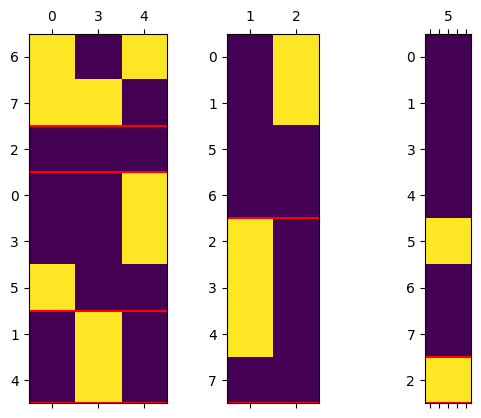

In [99]:
plot_state(my_state) 

In [91]:
for dim in my_state.views[2].dims:
    print(f"Dim {dim.index}: {dim.params}, {dim.hypers}")

Dim 5: [0.22897673516531825, 0.7332660242914494], {'s': 1.7243497742588065, 'b': 0.5785793245914403}


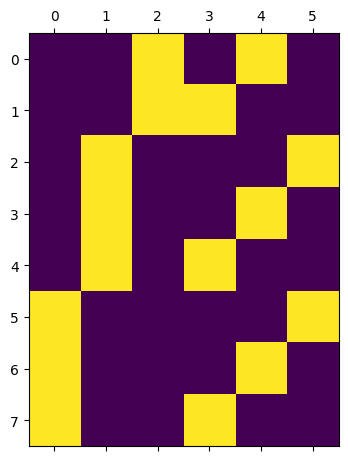

In [98]:
plt.matshow(data)

In [ ]:
# data = np.ones((1000, 2))
# data = np.concatenate((data, np.zeros((2000, 2))))
# n_obs, n_dims = data.shape